In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Brain Tumor Data Details
The data set for this project is split into two parts:
* `labels` -  all of the classes for our images
* `image_data` - two-dimensional representations of our images.

The corresponding index of an image in `labels` will be marked `1` if the person has a brain tumor, and `0` if they don't.

In [ ]:
!nvidia-smi

Mon Mar 25 01:37:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#Load your dataset
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Healthcare/Brain%20Tumor%20Detection/tumor.npy"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Healthcare/Brain%20Tumor%20Detection/tumor_labels.npy"

### pre-loading all data of interest
image_data = np.load('tumor.npy')
labels = np.load('tumor_labels.npy')

tumor.npy           100%[===================>]  16.29M  73.9MB/s    in 0.2s    
tumor_labels.npy    100%[===================>]   2.10K  --.-KB/s    in 0s      


In [ ]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


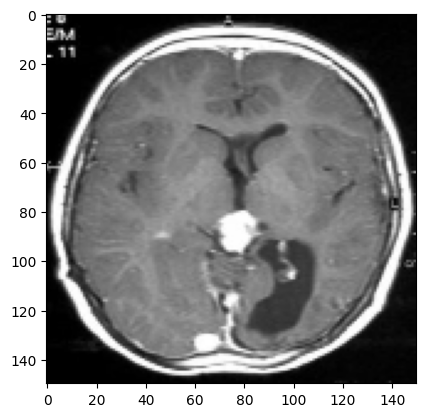

In [ ]:
plt.imshow(image_data[60])

In [ ]:
len(image_data), len(labels)

(253, 253)

In [ ]:
print(image_data.shape)

(253, 150, 150, 3)


In [ ]:
#Check number of images in each class
number_of_tumors = sum(labels == 1)
number_of_healthy = sum(labels == 0)

number_of_tumors, number_of_healthy

(155, 98)

#Data Pre-Processing
Augmenting data - left-right flip

Normalize values in the data to be in between 0 and 1

Remove background if needed

Convert RGB Channels to greyscale

Flatten image data

Split data into train and test sets.

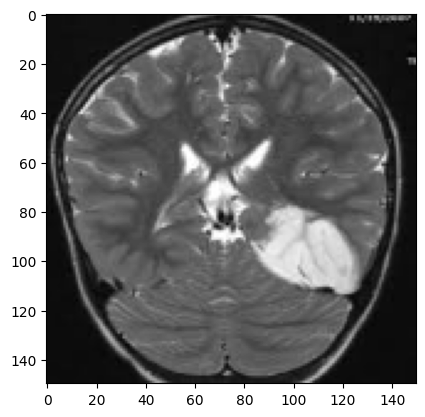

In [ ]:
gray_images = []

for image in image_data:
  gray_images.append(image[:,:,0])

plt.imshow(gray_images[1], cmap="gray")

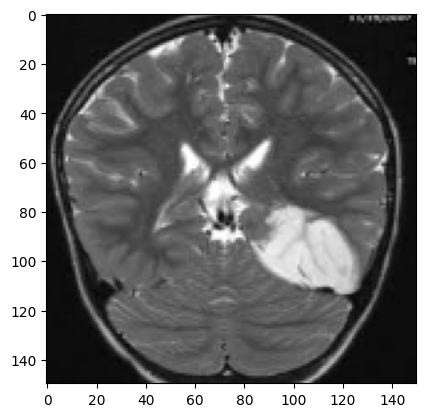

In [ ]:
#Normalize the dataset
normal_images = []

for image in gray_images:
  out = (image-np.min(image))/(np.max(image)-np.min(image))
  normal_images.append(out)

plt.imshow(normal_images[1], cmap="gray")

In [ ]:
data_with_augmented_images = []
augmented_labels = []

for image in range(len(normal_images)):
  data_with_augmented_images.append(normal_images[image])
  augmented_labels.append(labels[image])
  data_with_augmented_images.append(np.fliplr(normal_images[image]))
  augmented_labels.append(labels[image])

len(data_with_augmented_images), len(augmented_labels)#make sure data is as expected

(506, 506)

In [ ]:
#Flatten images
#image.flatten()
flattened_images = []
flattened_labels = augmented_labels.copy()

for image in data_with_augmented_images:
  flattened_images.append(image.flatten())

print(len(flattened_images[0]))

22500


In [ ]:
#Train Test Split, sklearn.train_test_split()
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(data_with_augmented_images, augmented_labels, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(flattened_images, flattened_labels, test_size=0.2, random_state=42)

#Sklearn AI Models
KNN

Random Forest

Multi-Layer Perceptron

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

In [ ]:
KNN = KNC(n_neighbors=23)
KNN.fit(X_train, y_train)
y_pred_knn = KNN.predict(X_test)
accuracy_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn)

(0.7450980392156863, 0.8571428571428571)

In [ ]:
accuracy_scores = []
recall_scores = []
neighbors_list = range(1, 50)
for i in neighbors_list:
  KNN_temp = KNC(n_neighbors=i)
  KNN_temp.fit(X_train, y_train)
  y_pred = KNN_temp.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))
  recall_scores.append(recall_score(y_test, y_pred))

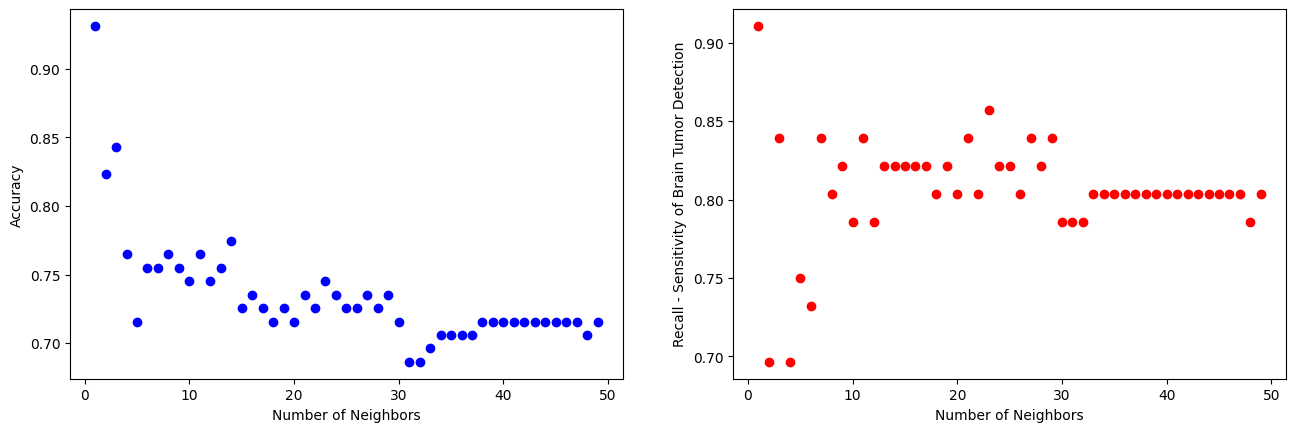

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(neighbors_list, accuracy_scores, c="blue")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
plt.scatter(neighbors_list, recall_scores, c="red")
plt.ylabel("Recall - Sensitivity of Brain Tumor Detection")
plt.xlabel("Number of Neighbors")
plt.subplots_adjust(left=0.1, right=2, wspace=0.2, hspace=0.4)

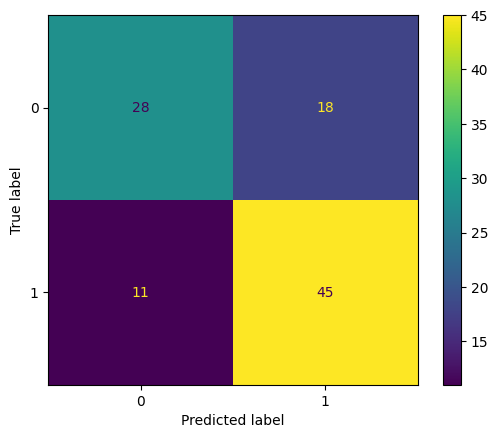

In [ ]:
CM = confusion_matrix(y_test, y_pred)
CM_disp = ConfusionMatrixDisplay(CM)
CM_disp.plot()
plt.show()

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100, max_depth=10,)
RF_model.fit(X_train, y_train)
y_pred_rf = RF_model.predict(X_test)
accuracy_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf)

(0.803921568627451, 0.9642857142857143)

In [ ]:
#Create for loop for each parameter - n_estimators - 50 - 500 step:50 range(50, 500, 50), max_depth
#Use best n_estimators for max_depth optimization: 1-15
#Confusion Matrix

In [ ]:
RF_accuracy_scores = []
RF_recall_scores = []
RF_estimators = range(50, 1000, 50)
for i in RF_estimators:
  temp_RF_model = RandomForestClassifier(n_estimators=i,)
  temp_RF_model.fit(X_train, y_train)
  temp_RF_pred =  temp_RF_model.predict(X_test)
  RF_accuracy_scores.append(accuracy_score(y_test, temp_RF_pred))
  RF_recall_scores.append(recall_score(y_test, temp_RF_pred))


[0.8333333333333334, 0.8235294117647058, 0.8235294117647058, 0.8137254901960784, 0.8235294117647058, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8235294117647058, 0.8333333333333334, 0.8235294117647058, 0.8235294117647058, 0.8333333333333334, 0.8235294117647058, 0.8333333333333334, 0.8235294117647058, 0.8235294117647058, 0.8137254901960784, 0.8333333333333334]


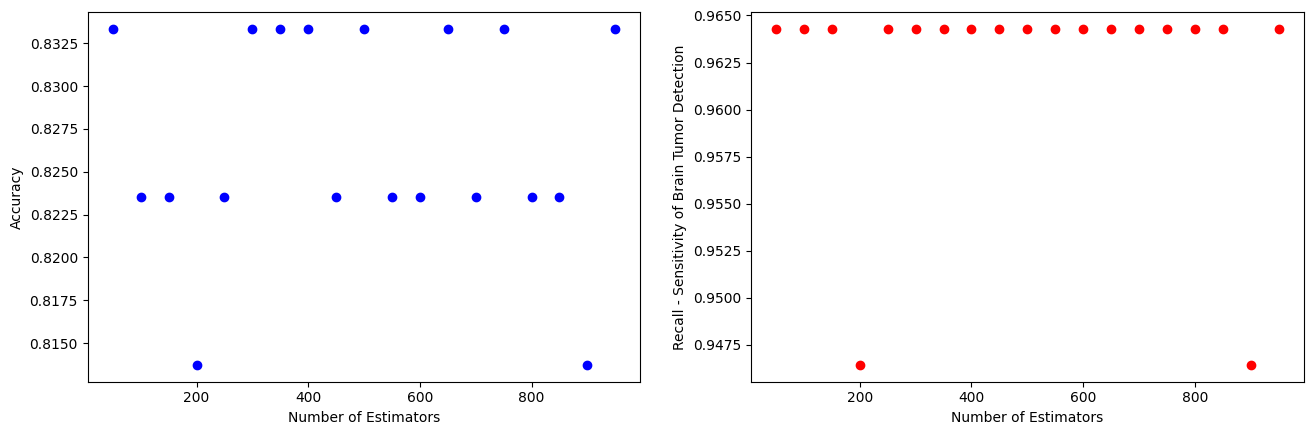

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(RF_estimators, RF_accuracy_scores, c="blue")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
plt.scatter(RF_estimators, RF_recall_scores, c="red")
plt.ylabel("Recall - Sensitivity of Brain Tumor Detection")
plt.xlabel("Number of Estimators")
plt.subplots_adjust(left=0.1, right=2, wspace=0.2, hspace=0.4)
print(RF_accuracy_scores)

In [ ]:
RF_depth_accuracy_scores = []
RF_depth_recall_scores = []
RF_depth = range(1, 15)
for i in RF_depth:
  temp_RF_model = RandomForestClassifier(n_estimators=150, max_depth=i)
  temp_RF_model.fit(X_train, y_train)
  temp_RF_pred = temp_RF_model.predict(X_test)
  RF_depth_accuracy_scores.append(accuracy_score(y_test, temp_RF_pred))
  RF_depth_recall_scores.append(recall_score(y_test, temp_RF_pred))


0


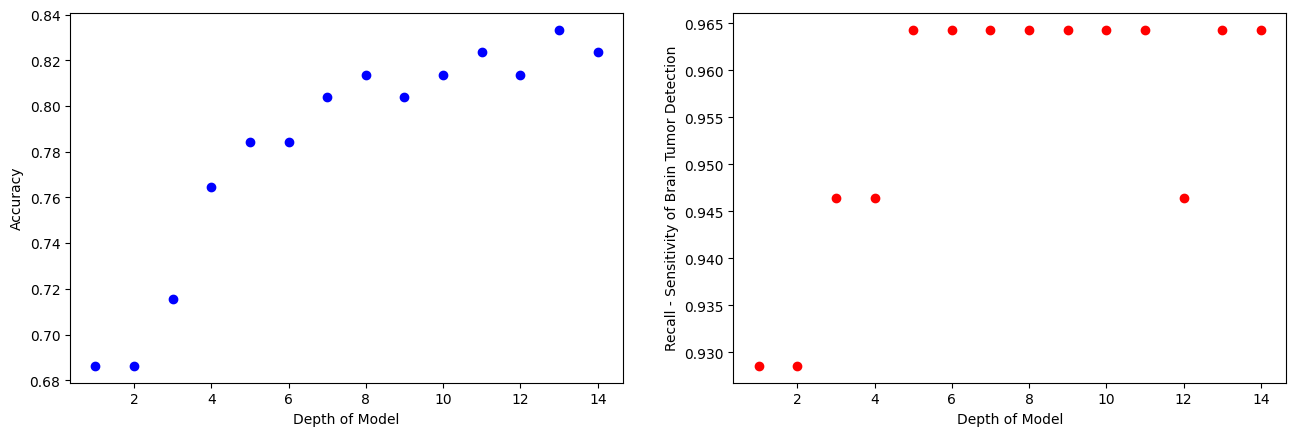

In [ ]:
 plt.subplot(1, 2, 1)
plt.scatter(RF_depth, RF_depth_accuracy_scores, c="blue")
plt.xlabel("Depth of Model")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
plt.scatter(RF_depth, RF_depth_recall_scores, c="red")
plt.ylabel("Recall - Sensitivity of Brain Tumor Detection")
plt.xlabel("Depth of Model")
plt.subplots_adjust(left=0.1, right=2, wspace=0.2, hspace=0.4)
print(RF_accuracy_scores.index(max(RF_accuracy_scores)))

In [ ]:
#Try creating MLP Classifier - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

MLP_model =  MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(50, 50))
MLP_model.fit(X_train, y_train)
MLP_y_pred = MLP_model.predict(X_test)
print(accuracy_score(y_test, MLP_y_pred), recall_score(y_test, MLP_y_pred))

0.8235294117647058 0.8928571428571429


In [ ]:
MLP_accuracy_scores = []
MLP_recall_scores = []
hidden_layers = [(10), (20), (30), (40), (50), (100), (150), (200), (250), (300)]
for i in hidden_layers:
  MLP_temp = MLPClassifier(random_state=1, hidden_layer_sizes=i,)
  MLP_temp.fit(X_train, y_train)
  MLP_y_pred = MLP_temp.predict(X_test)
  MLP_accuracy_scores.append(accuracy_score(y_test, MLP_y_pred))
  MLP_recall_scores.append(recall_score(y_test, MLP_y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(hidden_layers, MLP_accuracy_scores, c="blue")
plt.xlabel("Number of neurons per layer")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
plt.scatter(RF_depth, MLP_recall_scores, c="red")
plt.ylabel("Recall - Sensitivity of Brain Tumor Detection")
plt.xlabel("Number of neurons per layer")
plt.subplots_adjust(left=0.1, right=2, wspace=0.2, hspace=0.4)

#Tensorflow



In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import keras.optimizers as optimizers
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape, Dense, Conv2D, GlobalAveragePooling2D, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, concatenate, MaxPool2D, UpSampling2D
from ipywidgets import interact, IntSlider
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(data_with_augmented_images, augmented_labels, test_size=0.2, random_state=42)

In [ ]:
X_train_2 = np.reshape(X_train_nn, (np.shape(X_train_nn)[0], np.shape(X_train_nn)[1], 150))
X_test_2 = np.reshape(X_test_nn, (np.shape(X_test_nn)[0], np.shape(X_test_nn)[1], 150))

In [ ]:
nn_model = Sequential()
nn_model.add(Flatten(input_shape=(150, 150)))
nn_model.add(Dense(units=64, activation="relu"))
nn_model.add(Dropout(0.33))
nn_model.add(Dense(units=128, activation="relu"))
nn_model.add(Dropout(0.33))
nn_model.add(Dense(units=128, activation="relu"))
nn_model.add(Dropout(0.33))
nn_model.add(Dense(units=2, activation="sigmoid"))

nn_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.001, ema_momentum=0.8), metrics=["accuracy"])
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 22500)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1440064   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [ ]:
import seaborn as sns

def plot_acc(history, ax = None, xlabel = 'Epoch #'):

    if hasattr(history, 'history_'):
      history = history.history_
    else:
      history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()

Epoch 1/100
13/13 [==============================] - 4s 40ms/step - loss: 1.1956 - accuracy: 0.5569 - val_loss: 0.6251 - val_accuracy: 0.6569
Epoch 2/100
13/13 [==============================] - 0s 14ms/step - loss: 0.6084 - accuracy: 0.6634 - val_loss: 0.6301 - val_accuracy: 0.6373
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 0.5904 - accuracy: 0.6658 - val_loss: 0.5869 - val_accuracy: 0.6961
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.5803 - accuracy: 0.6931 - val_loss: 0.5921 - val_accuracy: 0.6667
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 0.5682 - accuracy: 0.7030 - val_loss: 0.5917 - val_accuracy: 0.6765
Epoch 6/100
13/13 [==============================] - 0s 15ms/step - loss: 0.5312 - accuracy: 0.7401 - val_loss: 0.5437 - val_accuracy: 0.7157
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4717 - accuracy: 0.7797 - val_loss: 0.5527 - val_accuracy: 0.6863
Epoch 

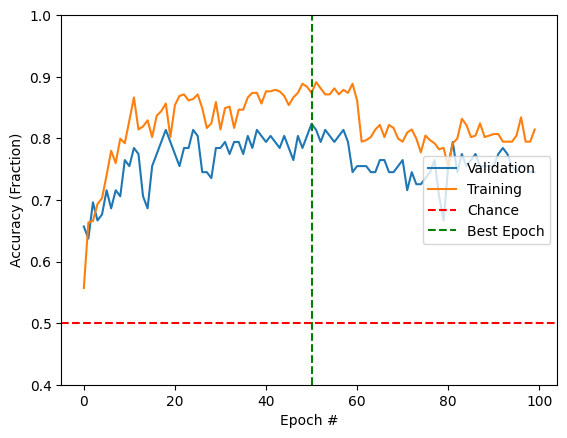

In [ ]:
from keras.utils import to_categorical

history = nn_model.fit(X_train_2, to_categorical(y_train_nn), validation_data=(X_test_2, to_categorical(y_test_nn)), epochs=100)
# nn_model.evaluate()
plot_acc(history)

In [ ]:
import tensorflow as tf
# Define the model
classes = ['No-Tumor', 'Tumor']
CNNmodel = tf.keras.Sequential([
  tf.keras.layers.Conv2D(75, (2,2), strides = 2, activation='relu', input_shape=(150, 150,1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])
# Compile the model
CNNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = CNNmodel.fit(Xtrain_tf, ytrain_tf, epochs= 40, validation_data=(Xtest_tf, ytest_tf))

NameError: name 'Xtrain_tf' is not defined

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
X_train_pt, X_test_pt, y_train_pt, y_test_pt = torch.tensor(np.array(X_train_nn), dtype=torch.float32), torch.tensor(np.array(X_test_nn), dtype=torch.float32), torch.tensor(np.array(y_train_nn), dtype=torch.float32), torch.tensor(np.array(y_test_nn), dtype=torch.float32)

In [ ]:
class CNN(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,
                  hidden_units,
                  kernel_size =3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        # nn.Flatten(),
        nn.Linear(in_features=37*37*10,
                  out_features=output_shape),

    )
  def forward(self, x: torch.Tensor):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)).view(-1, 10*37*37))


In [ ]:
torch.manual_seed(42)
model_0 = CNN(input_shape=1, # 1 input channel
                  hidden_units=10,
                  output_shape=2).to(device)
model_0

CNN(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=13690, out_features=2, bias=True)
  )
)

(<matplotlib.image.AxesImage at 0x7f3fb4412ef0>, tensor(0.))

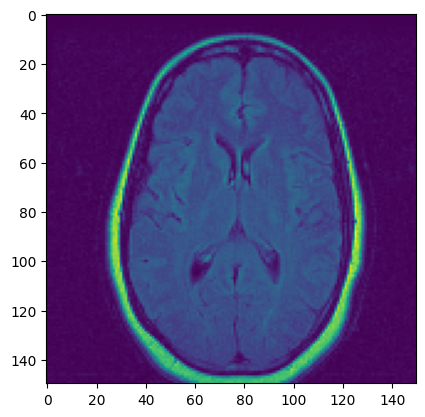

In [ ]:
img_batch, label_batch = X_train_pt[0], y_train_pt[0]

plt.imshow(img_batch.view(150, 150)), label_batch

In [ ]:
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_batch.unsqueeze(dim=0).to(device))


In [ ]:
def train_step(model: torch.nn.Module,
               X_train: torch.Tensor,
               y_train: torch.Tensor,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    for batch in range(len(X_train)):
        X, y = X_train[batch].to(device), y_train[batch].to(device)
        y_pred = model(X).to(torch.float32)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    train_loss = train_loss / len(X_train)
    train_acc = train_acc / len(X_train)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              X_test: torch.Tensor,
              y_test: torch.Tensor,
              loss_fn: torch.nn.Module):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch in range(len(X_test)):
            X, y = X_test[batch].to(device), y_test[batch].to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))


    test_loss = test_loss / len(X_test)
    test_acc = test_acc / len(X_test)
    return test_loss, test_acc,

In [ ]:
def train(model: torch.nn.Module,
          X_train: torch.Tensor,
          y_train: torch.Tensor,
          X_test: torch.Tensor,
          y_test: torch.Tensor,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": [],
    }
    for epoch in range(epochs):

        train_loss, train_acc = train_step(model=model,
                                           X_train=X_train,
                                           y_train=y_train,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)

        test_loss, test_acc = test_step(model=model,
            X_test=X_test,
            y_test=y_test,
            loss_fn=loss_fn)
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results


In [ ]:
X_dummy = torch.randn(404, 1, 150, 150).to(device)
y_pred = model_0(X_dummy)

In [ ]:
EPOCHS = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
model_0_results = train(model=model_0,
                        X_train=X_train_pt.view(-1, 1, 150, 150),
                        y_train=y_train_pt.unsqueeze(dim=1).long(),
                        X_test=X_test_pt.view(-1, 1, 150, 150),
                        y_test=y_test_pt.unsqueeze(dim=1).long(),
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=EPOCHS)

Epoch: 1 | train_loss: 0.5869 | train_acc: 0.7351 | test_loss: 0.5517 | test_acc: 0.7059
Epoch: 2 | train_loss: 0.4609 | train_acc: 0.8045 | test_loss: 0.4724 | test_acc: 0.8039
Epoch: 3 | train_loss: 0.3298 | train_acc: 0.8738 | test_loss: 0.3939 | test_acc: 0.8529
Epoch: 4 | train_loss: 0.2161 | train_acc: 0.9183 | test_loss: 0.5089 | test_acc: 0.8235
Epoch: 5 | train_loss: 0.1265 | train_acc: 0.9629 | test_loss: 0.4755 | test_acc: 0.8529
Epoch: 6 | train_loss: 0.0778 | train_acc: 0.9703 | test_loss: 1.9234 | test_acc: 0.7255
Epoch: 7 | train_loss: 0.0908 | train_acc: 0.9728 | test_loss: 0.4386 | test_acc: 0.8529
Epoch: 8 | train_loss: 0.0185 | train_acc: 0.9926 | test_loss: 0.5476 | test_acc: 0.8333
Epoch: 9 | train_loss: 0.0055 | train_acc: 1.0000 | test_loss: 0.4468 | test_acc: 0.8529
Epoch: 10 | train_loss: 0.0015 | train_acc: 1.0000 | test_loss: 0.5243 | test_acc: 0.8922
Epoch: 11 | train_loss: 0.0005 | train_acc: 1.0000 | test_loss: 0.5505 | test_acc: 0.8824
Epoch: 12 | train_l

[[37  9]
 [ 1 55]]
accuracy is 0.9019607843137255
Recall is 0.9821428571428571


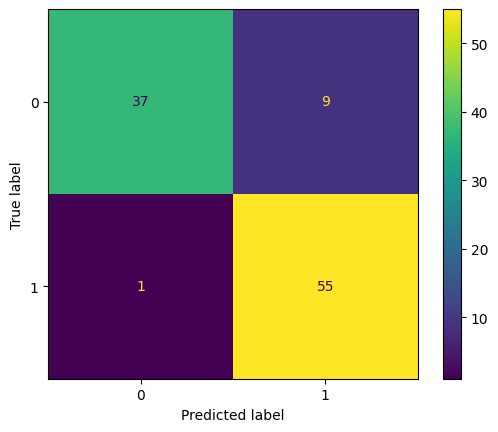

In [ ]:

model_0.eval()
y_preds = []
with torch.inference_mode():
  for batch in range(len(X_test_pt)):
      X, y = X_test_pt[batch].to(device), y_test_pt[batch].to(device)
      test_pred_logits = model_0(X.view(-1, 150, 150))
      test_pred_labels = test_pred_logits.argmax(dim=1)
      y_preds.append(test_pred_labels.to("cpu").item())

print(confusion_matrix(y_test_pt.to("cpu"), y_preds))
print ('accuracy is ' + str(accuracy_score(y_test_pt, y_preds)))
print ('Recall is ' + str(recall_score(y_test_pt, y_preds)))
cm_cnn= confusion_matrix(y_test_pt, y_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn)
disp.plot()
plt.show()

In [ ]:
!pip install hiddenlayer

In [ ]:
next(iter(X_train_pt)).shape

torch.Size([150, 150])

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 2.8

In [ ]:
from torchviz import make_dot

batch = next(iter(X_train_pt)).view(1, 150, 150).to(device)
yhat = model_0(batch)

make_dot(yhat, params=dict(list(model_0.named_parameters()))).render("CNN_iter_one", format="png")

ModuleNotFoundError: No module named 'torchviz'

In [ ]:
import hiddenlayer as hl

transforms = [ hl.transforms.Prune('Constant') ]

batch = next(iter(X_train_pt)).view(1, 150, 150).to(device)
yhat = model_0(batch)

graph = hl.build_graph(model_0, batch)
graph.theme = hl.graph.THEMES['blue'].copy()
graph.save('rnn_hiddenlayer', format='png')


AttributeError: module 'torch.onnx' has no attribute '_optimize_trace'

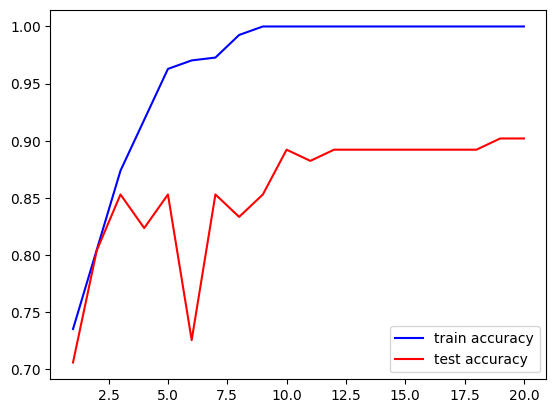

In [ ]:
plt.plot(list(range(1, EPOCHS+1)), model_0_results["train_acc"], color = "blue", label="train accuracy")

plt.plot(list(range(1, EPOCHS+1)), model_0_results["test_acc"], color = "red",  label="test accuracy")
plt.legend()

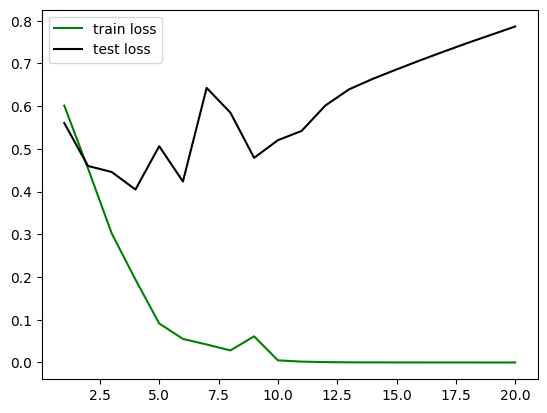

In [ ]:
plt.plot(list(range(1, EPOCHS+1)), model_0_results["train_loss"], color = "green", label = "train loss")
plt.plot(list(range(1, EPOCHS+1)), model_0_results["test_loss"], color = "black", label = "test loss")
plt.legend()

In [ ]:
# add in dropouts, make new model to show the progression of the models

In [ ]:
class CNN_Dropouts(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,
                  hidden_units,
                  kernel_size =3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Linear(in_features=37*37*10,
                  out_features=64),
        nn.Dropout(0.7),
        nn.Linear(in_features=64,
                  out_features=128),
        nn.Dropout(0.7),
        nn.Linear(in_features=128,
                  out_features=128),
        nn.Dropout(0.7),
        nn.Linear(in_features=128,
                  out_features=output_shape),

    )
  def forward(self, x: torch.Tensor):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)).view(-1, 10*37*37))


In [ ]:
torch.manual_seed(42)
model_1 = CNN_Dropouts(input_shape=1, # 1 input channel
                  hidden_units=10,
                  output_shape=2).to(device)
model_1

CNN_Dropouts(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=13690, out_features=64, bias=True)
    (1): Dropout(p=0.7, inplace=False)
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): Dropout(p=0.7, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): Dropout(p=0.7, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [ ]:
EPOCHS = 17
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)
model_1_results = train(model=model_1,
                        X_train=X_train_pt.view(-1, 1, 150, 150),
                        y_train=y_train_pt.unsqueeze(dim=1).long(),
                        X_test=X_test_pt.view(-1, 1, 150, 150),
                        y_test=y_test_pt.unsqueeze(dim=1).long(),
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=EPOCHS)

Epoch: 1 | train_loss: 0.6941 | train_acc: 0.6262 | test_loss: 0.6602 | test_acc: 0.5490
Epoch: 2 | train_loss: 0.6352 | train_acc: 0.6535 | test_loss: 0.6000 | test_acc: 0.6961
Epoch: 3 | train_loss: 0.5604 | train_acc: 0.7475 | test_loss: 0.5519 | test_acc: 0.7451
Epoch: 4 | train_loss: 0.5165 | train_acc: 0.7772 | test_loss: 0.5119 | test_acc: 0.7255
Epoch: 5 | train_loss: 0.4186 | train_acc: 0.8193 | test_loss: 0.4715 | test_acc: 0.7647
Epoch: 6 | train_loss: 0.4147 | train_acc: 0.8069 | test_loss: 0.4884 | test_acc: 0.7647
Epoch: 7 | train_loss: 0.2647 | train_acc: 0.9183 | test_loss: 0.5932 | test_acc: 0.7549
Epoch: 8 | train_loss: 0.3145 | train_acc: 0.8762 | test_loss: 0.4467 | test_acc: 0.8039
Epoch: 9 | train_loss: 0.2128 | train_acc: 0.9233 | test_loss: 0.5761 | test_acc: 0.7745
Epoch: 10 | train_loss: 0.3325 | train_acc: 0.8960 | test_loss: 0.5413 | test_acc: 0.7549
Epoch: 11 | train_loss: 0.2861 | train_acc: 0.9084 | test_loss: 0.5461 | test_acc: 0.8235
Epoch: 12 | train_l

Dropout 0.7


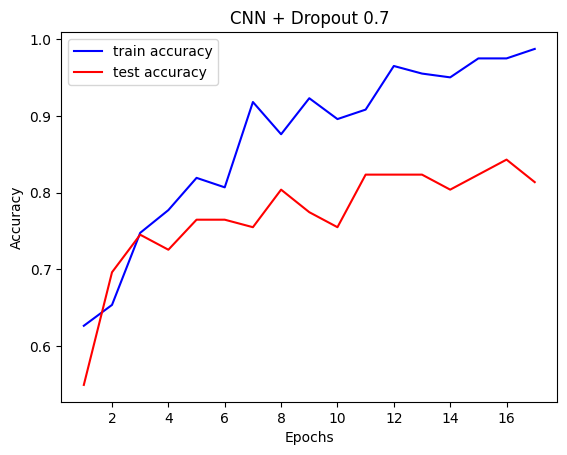

In [ ]:
plt.plot(list(range(1, EPOCHS+1)), model_1_results["train_acc"], color = "blue", label="train accuracy")

plt.plot(list(range(1, EPOCHS+1)), model_1_results["test_acc"], color = "red",  label="test accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN + Dropout 0.7")
print("Dropout 0.7")

Dropout 0.7


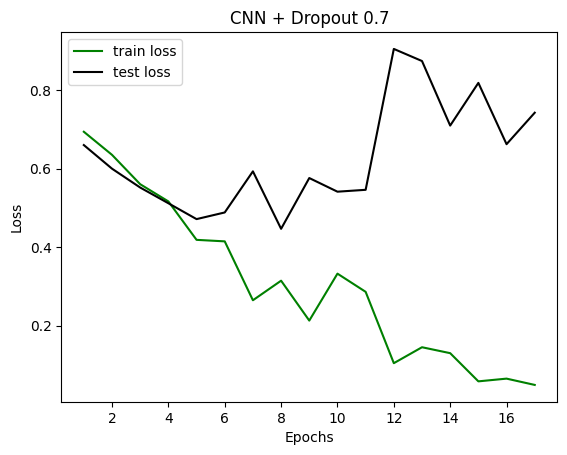

In [ ]:
plt.plot(list(range(1, EPOCHS+1)), model_1_results["train_loss"], color = "green", label = "train loss")
plt.plot(list(range(1, EPOCHS+1)), model_1_results["test_loss"], color = "black", label = "test loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CNN + Dropout 0.7")
print("Dropout 0.7")

In [ ]:
model_1.eval()
y_preds = []
with torch.inference_mode():
  for batch in range(len(X_test_pt)):
      X, y = X_test_pt[batch].to(device), y_test_pt[batch].to(device)
      test_pred_logits = model_1(X.view(-1, 150, 150))
      test_pred_labels = test_pred_logits.argmax(dim=1)
      y_preds.append(test_pred_labels.to("cpu").item())

[[38  8]
 [11 45]]
accuracy is 0.8137254901960784
Recall is 0.8035714285714286


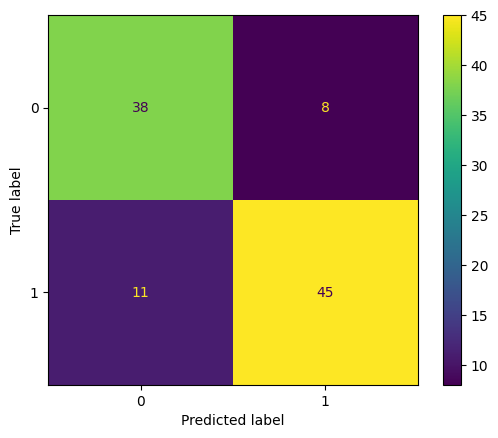

In [ ]:
print(confusion_matrix(y_test_pt.to("cpu"), y_preds))
# report = classification_report(y_test_pt, y_preds, target_names=classes)
# print(report)
print ('accuracy is ' + str(accuracy_score(y_test_pt, y_preds)))
print ('Recall is ' + str(recall_score(y_test_pt, y_preds)))
cm_cnn= confusion_matrix(y_test_pt, y_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn)
disp.plot()
plt.show()